20 13 2 3 2


<IPython.core.display.Javascript object>


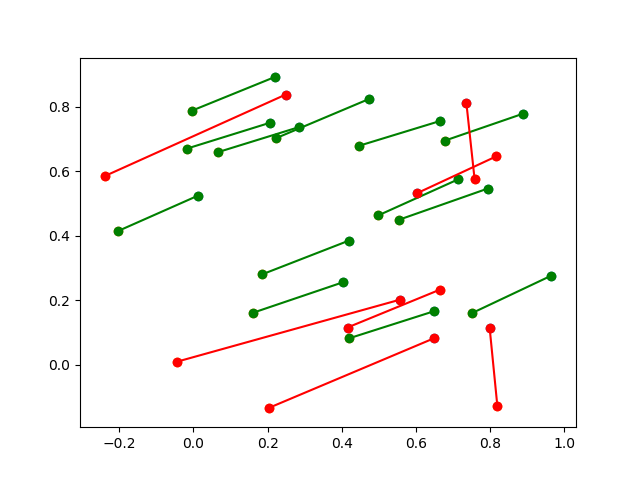

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
import random

#20 initial dots
N = 20
Nnorm = 13
Nopp = 2
Nlong = 3
Nside = N-Nnorm-Nopp-Nlong

print(N, Nnorm, Nopp, Nlong, Nside)


x = np.random.rand(N)
y = np.random.rand(N)

basis = np.random.rand(2)-0.5 #normalize direction
basLen = math.sqrt(basis[0]*basis[0] + basis[1]*basis[1])

#create vectors based on basis
xfin = x + basis[0]
yfin = y + basis[1]

#add variation in len and angle, max variation - 10%
xfin = xfin + np.random.rand(N) * basLen/5 - basLen/10
yfin = yfin + np.random.rand(N) * basLen/5 - basLen/10

#change direction
for i in range(Nnorm, Nnorm+Nopp):
    a = yfin[i] 
    yfin[i] = y[i]
    y[i] = a
    
    a = xfin[i]
    xfin[i] = x[i]
    x[i] = a
    
#longer vectors
for i in range(Nnorm+Nopp, Nnorm+Nopp+Nlong):
    longLen = 0.4 + np.random.rand(1)*2 
    xfin[i] = xfin[i] + longLen*basis[0] + np.random.rand(1) * longLen/5 - longLen/10
    yfin[i] = yfin[i] + longLen*basis[1] + np.random.rand(1) * longLen/5 - longLen/10
    
#vectors more than 45 degrees from current
for i in range(Nnorm+Nopp+Nlong, N):
    #more variation in len - 25%(+10%)
    xfin[i] = xfin[i] + np.random.rand(1) * basLen/2 - basLen/4
    yfin[i] = yfin[i] + np.random.rand(1) * basLen/2 - basLen/4
    
    # angle between 45 and 135 degrees
    angle = 0.79 + 1.57*np.random.rand(1)
    angle = angle*random.choice([1, -1])
    
    qx = x[i] + math.cos(angle) * (xfin[i] - x[i]) - math.sin(angle) * (yfin[i] - y[i])
    qy = y[i] + math.sin(angle) * (xfin[i] - x[i]) + math.cos(angle) * (yfin[i] - y[i])
    
    xfin[i] = qx
    yfin[i] = qy
    
    
plt.scatter(x,y)
plt.scatter(xfin,yfin)
plt.show()


In [15]:
#plot with segments
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
    
for i in range(0, Nnorm):
    # data
    df=pd.DataFrame({'x': [x[i], xfin[i]], 'vertical': [y[i], yfin[i]] })
 
    # plot
    plt.plot( 'x', 'vertical', color='green', data=df, linestyle='-', marker='o')
    
for i in range(Nnorm, N):
    # data
    df=pd.DataFrame({'x': [x[i], xfin[i]], 'vertical': [y[i], yfin[i]] })
 
    # plot
    plt.plot( 'x', 'vertical', color='red', data=df, linestyle='-', marker='o')
    
#plt.gca().axes.get_yaxis().set_visible(False)
#plt.gca().axes.get_xaxis().set_visible(False)
axes = plt.gca()
ylim = axes.get_ylim()
xlim = axes.get_xlim()

# print(xlim,ylim)

bottom = 0
if xlim[0] < ylim[0]:
    bottom = xlim[0]
else:
    bottom=ylim[0]

top = 0
if ylim[1] < xlim[1]:
    top = xlim[1]
else:
    top=ylim[1]
    
    
import pickle

# write a file
f = open("5.txt", "wb")
pickle.dump((N, Nnorm, Nopp, Nlong, Nside, bottom, top), f)
pickle.dump(basis, f)
pickle.dump(x, f)
pickle.dump(y, f)
pickle.dump(xfin, f)
pickle.dump(yfin, f)

f.close()


# f= open("test.txt","w+")
# f.write(str(N) + " " + str(Nnorm) + " " + str(Nopp) + " " + str(Nlong) + " " + str(Nside) + "\n")
# f.write(str(bottom) + " " + str(top) + " " + str(xlim) + " " + str(ylim) + "\n")
# f.write(str(x) + "\n" + str(y) + "\n" + str(xfin) + "\n" + str(yfin) + "\n")
# for i in range(0, N):
#     f.write(str(x[i]) + " " + str(y[i]) + " " + str(xfin[i]) + " " + str(yfin[i]) + "\n")
# f.close() 

xlim = (bottom, top)
ylim = (bottom, top)
# print(xlim,ylim)

plt.show()

In [ ]:
#load data from file


<IPython.core.display.Javascript object>


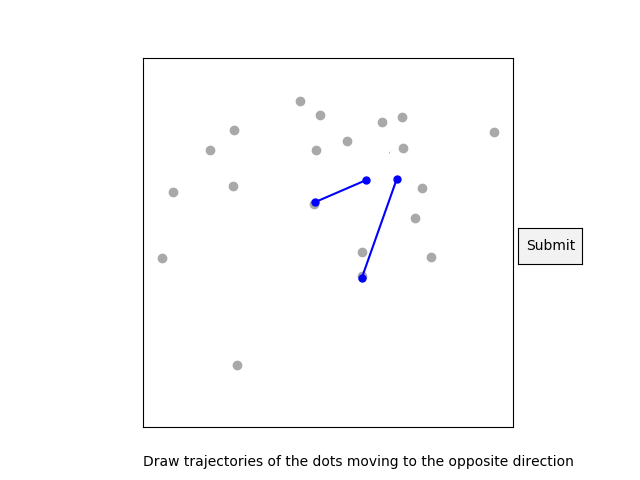

In [100]:
# tail length depends on the path
# import matplotlib
# matplotlib.use("Qt5Agg")

import matplotlib.pyplot as plt
from matplotlib import animation
from numpy import random 
from matplotlib.widgets import Button
from matplotlib.backend_bases import MouseEvent

import time


fig = plt.figure()
ax = plt.axes(xlim=xlim, ylim=ylim)
plt.gca().axes.set_aspect('equal', 'box')
line, = ax.plot([], [], lw=2)

_dragging_point = None
_segments = []
_lines = [None, None, None]

plotlays = N
lines = []
numclicks = 0
enable_clicks = 0
annotation = None

for index in range(N):
    lobj = ax.plot([],[],lw=2,color='lightgrey')[0]
    lines.append(lobj)
    
for index in range(N):
    lobj = ax.plot([],[],color='darkgrey', marker='o', markeredgecolor='darkgrey')[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
    return lines


frame_num = 200
dots = 200
TAIL_LEN = 1

def animate(i):
    global ax
    global annotation
    time = (i%(frame_num))/(frame_num*1.0)
    headtime = time*(1+TAIL_LEN)
    tailtime = time*(1+TAIL_LEN)-TAIL_LEN
    if headtime > 1:
            headtime = 1
    if tailtime < 0:
            tailtime = 0
    
    xs = []
    ys = []
    for j in range(N):
        xs.append(np.linspace(x[j]+(xfin[j]-x[j])*tailtime, x[j]+(xfin[j]-x[j])*headtime, dots))
        ys.append(np.linspace(y[j]+(yfin[j]-y[j])*tailtime, y[j]+(yfin[j]-y[j])*headtime, dots))
        
    for j in range(N):
        xs.append(x[j]+(xfin[j]-x[j])*headtime)
        ys.append(y[j]+(yfin[j]-y[j])*headtime)
      
    for lnum,line in enumerate(lines):
        line.set_data(xs[lnum], ys[lnum])
        
    
    global enable_clicks
    if i == frame_num-1 and numclicks == 0:
        anim.event_source.stop()
        annotation = ax.annotate('Click when you are ready to replay', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
        fig.canvas.mpl_connect('button_press_event', onClick)
        enable_clicks = 1
    else:
        if i == frame_num-1:
            enable_clicks = 1 
            annotation.remove()
            annotation = ax.annotate('Click to answer', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
        
    return lines

def onClick(event):
    global numclicks
    global _dragging_point
    global enable_clicks
    global axnext

    if not enable_clicks:
        return;
    
    if numclicks == 0:
        numclicks = 1
        restart()
        enable_clicks = 0
    else:
        if numclicks == 1:
            numclicks = numclicks + 1
            start_picking()
        else:
            # left click
            if event.button == 1 and event.inaxes in [ax]:
                point = _find_neighbor_point(event)
                if point:
                    _dragging_point = (point[0], point[1])
                    _replace_point(point[0], point[1], event.xdata, event.ydata)
                else:
                    _add_point(event)
                    _update_plot()
                    
            elif event.button == 3 and event.inaxes in [ax]:
                point = _find_neighbor_point(event)
                if point:
                    _remove_segment(point[0])
                    _update_plot()

def _update_plot():
    global _lines
    global _segments
    if not _segments:
        for i in range(0, 3):
            if _lines[i]:
                _lines[i].set_data([0], [0])
                _lines[i].set_alpha(0.0)
            fig.canvas.draw()
            return
        
    for num,segment in enumerate(_segments):
        xseg = []
        yseg = []
        for pair in segment:
            xseg.append(pair[0])
            yseg.append(pair[1])
            
        if not _lines[num]:
            _lines[num], = ax.plot(xseg, yseg, "b", marker="o", markersize=5)
        
            # Update current plot
        else:
            _lines[num].set_data(xseg, yseg)
            _lines[num].set_alpha(1.0)
                
        
        
    for i in range(num+1, 3):
        if _lines[i]:
            _lines[i].set_data([0], [0])
            _lines[i].set_alpha(0.0)
            
    fig.canvas.draw()
            
def _add_point(xloc, yloc=None):
    global _segments

    if isinstance(xloc, MouseEvent):
        xloc, yloc = xloc.xdata, xloc.ydata
        if not _segments:
            _segments.append([(xloc,yloc)])

            return xloc, yloc
        for segment in _segments:
            if len(segment) < 2:
                segment.append((xloc,yloc))

                return xloc, yloc
        if len(_segments) < 3:
            _segments.append([(xloc,yloc)])
    return xloc, yloc
    
def _remove_segment(segnum):
    del _segments[segnum]
    
def _replace_point(segindex, index, xnew, ynew):
    _segments[segindex][index] = (xnew,ynew)
            
            
def _find_neighbor_point(event):
    global _segments
    distance_threshold = 0.03
    nearest_point = None
    min_distance = math.sqrt(2 * (100 ** 2))
    for snum,segment in enumerate(_segments):
        for pnum,pair in enumerate(segment):
                
            distance = math.hypot(event.xdata - pair[0], event.ydata - pair[1])
                
            if distance < min_distance:
                min_distance = distance
                nearest_point = (snum, pnum)
            if min_distance < distance_threshold:
                return nearest_point
    return None
    
def restart():
    anim.frame_seq = anim.new_frame_seq() 
    anim.event_source.start()
    
def start_picking():
    global annotation
    annotation.remove()
    annotation = ax.annotate('Draw trajectories of the dots moving to the opposite direction', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
        
    fig.canvas.mpl_connect('button_release_event', _on_release)
    fig.canvas.mpl_connect('motion_notify_event', _on_motion)
    
def _on_release(event):
    global _dragging_point
    if event.button == 1 and event.inaxes in [ax] and _dragging_point:
        _replace_point(_dragging_point[0], _dragging_point[1], event.xdata, event.ydata)
        _dragging_point = None
        _update_plot()
    
def _on_motion(event):
        return
#     if not _dragging_point:
#         return
#     _replace_point(_dragging_point[0], _dragging_point[1], event.xdata, event.ydata)
#     _update_plot()
    
# def pfile(stringa):
#     f= open("test.txt","a")
#     f.write("\n")
#     f.write(stringa)
#     f.close() 

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=10, blit=True, repeat=False)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

def graph_submit(event):
    if numclicks == 2:
        plt.close()
    
axnext = plt.axes([0.81, 0.45, 0.1, 0.075])
bnext = Button(axnext, 'Submit')
bnext.on_clicked(graph_submit)


plt.show()
# plt.close()



In [ ]:
#show answer



In [ ]:
# record answer


In [ ]:
# tail length depends on basis vector

import matplotlib.pyplot as plt
from matplotlib import animation
from numpy import random 
import math

fig = plt.figure()
ax1 = plt.axes(xlim=xlim, ylim=ylim)
plt.gca().axes.set_aspect('equal', 'box')
line, = ax1.plot([], [], lw=2)

plotlays = N
lines = []
for index in range(N):
    lobj = ax1.plot([],[],lw=2,color='lightgrey')[0]
    lines.append(lobj)
    
for index in range(N):
    lobj = ax1.plot([],[],color='darkgrey', marker='o', markeredgecolor='darkgrey')[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
    return lines


frame_num = 200
dots = 50
TAIL_LEN = 0.5

def animate(i):
    time = (i%(frame_num))/(frame_num*1.0)
    
    
    xs = []
    ys = []
    for j in range(N):
        
        vectorLen = math.sqrt((xfin[j]-x[j])*(xfin[j]-x[j]) + (yfin[j]-y[j])*(yfin[j]-y[j]))
        basLen = math.sqrt(basis[0]*basis[0] + basis[1]*basis[1])
        
        deltahead = time*(1+basLen*TAIL_LEN/vectorLen)
        if deltahead > 1:
            deltahead = 1
        
        deltatail = time*(1+basLen*TAIL_LEN/vectorLen)-basLen*TAIL_LEN/vectorLen
        if deltatail < 0:
            deltatail = 0
            
            
        xs.append(np.linspace(x[j]+(xfin[j]-x[j])*deltatail, x[j]+(xfin[j]-x[j])*deltahead, dots))
        ys.append(np.linspace(y[j]+(yfin[j]-y[j])*deltatail, y[j]+(yfin[j]-y[j])*deltahead, dots))
        
    for j in range(N):
        vectorLen = math.sqrt((xfin[j]-x[j])*(xfin[j]-x[j]) + (yfin[j]-y[j])*(yfin[j]-y[j]))
        
        deltahead = time*(1+basLen*TAIL_LEN/vectorLen)
        if deltahead > 1:
            deltahead = 1
        xs.append(x[j]+(xfin[j]-x[j])*deltahead)
        ys.append(y[j]+(yfin[j]-y[j])*deltahead)
      
    for lnum,line in enumerate(lines):
        line.set_data(xs[lnum], ys[lnum])
        
    
    return lines

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=1, blit=True)

anim.save('test.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


plt.show()